# Null space and range

Now that you know what linear transformations are, you are ready to delve deeper into their properties. We are going to introduce two new sets that are intimately related to them: the **null space** and the **image**. Both arise naturally in the context of systems of equations.

Thanks to them, you will be able to reinterpret these systems, discover several relevant facts about them, and even analyze them geometrically. Here, you will work with a linear transformation $T$ between two vector spaces $V$ and $W$.


## Null space

Let us look at an $m \times n$ homogeneous system of linear equations. You already know that it can be represented as a matrix equation

$Ax = 0$.

If you recall the linear transformation $L_A$ associated with the matrix $A$, which is defined by $L_A(x) = Ax$, then the equation can be written as

$L_A(x) = 0$.

Thus, the solutions of $Ax = 0$ are precisely the vectors that the transformation $L_A$ maps to $0$. For any linear transformation $T$, the set of such vectors plays an important role and is called the **null space** (or **kernel**) of $T$:

$\ker(T) = \{\, v \in V : T(v) = 0 \,\}$.

The null space has many interesting properties. The first one is that it is not just a set, but a **subspace**.

### Proof that $\ker(T)$ is a subspace

If $v, u \in \ker(T)$, then $T(v) = T(u) = 0$. It follows that

$T(u + v) = T(u) + T(v) = 0 + 0 = 0$,

so $u + v \in \ker(T)$. Similarly,

$T(\lambda v) = \lambda T(v) = \lambda 0 = 0$,

which implies $\lambda v \in \ker(T)$.
$\blacksquare$


Returning to systems of linear equations, this shows that the solutions of the homogeneous system $Ax = 0$ are exactly the null space of $L_A$.

Now consider the matrix

$A =
\begin{pmatrix}
6 & 2 & 8 \\
15 & 5 & 20
\end{pmatrix}$.

You can find the solutions of $Ax = 0$ by computing a row-echelon form of $A$. Doing so, you obtain

$\ker(L_A) = \{\, \lambda(-1, 3, 0) + \mu(-4, 0, 3) : \lambda, \mu \in \mathbb{R} \,\}$.

This means that $(-1, 3, 0)^T$ and $(-4, 0, 3)^T$ form a basis of the null space. Hence, the null space of $L_A$ is a plane.

$\ker(L_A) = \operatorname{span}\{(-1, 3, 0), (-4, 0, 3)\}$.


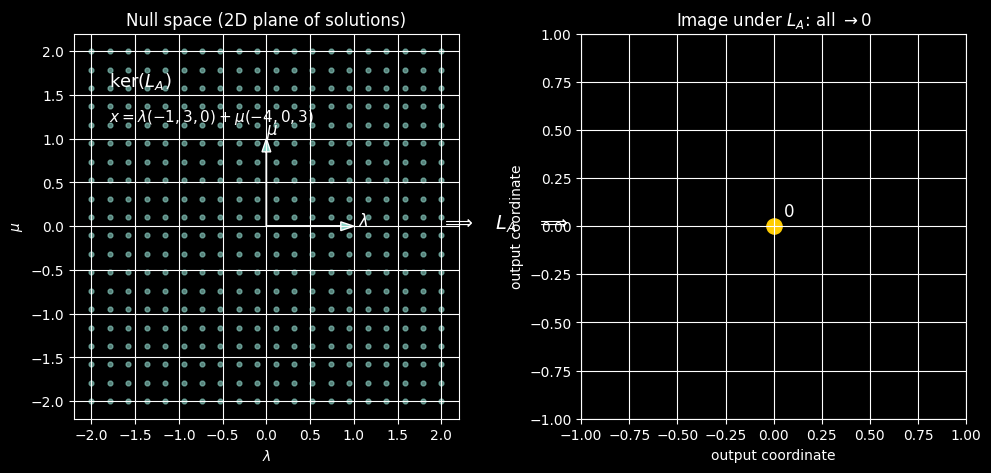

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ============================
# LEFT: Null space (parameter space)
# ============================
ax = axes[0]

# Parameter grid (λ, μ)
lam = np.linspace(-2, 2, 20)
mu  = np.linspace(-2, 2, 20)
L, M = np.meshgrid(lam, mu)

# Draw the plane as a filled region
ax.scatter(L, M, s=12, alpha=0.6)

# Basis directions in parameter space
ax.arrow(0, 0, 1, 0, head_width=0.1, length_includes_head=True)
ax.arrow(0, 0, 0, 1, head_width=0.1, length_includes_head=True)

ax.text(1.05, 0, r"$\lambda$", fontsize=12)
ax.text(0, 1.05, r"$\mu$", fontsize=12)

ax.text(-1.8, 1.6,
        r"$\ker(L_A)$",
        fontsize=13)

ax.text(-1.8, 1.2,
        r"$x=\lambda(-1,3,0)+\mu(-4,0,3)$",
        fontsize=11)

ax.set_aspect("equal")
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)

ax.set_xlabel(r"$\lambda$")
ax.set_ylabel(r"$\mu$")
ax.set_title("Null space (2D plane of solutions)")
ax.grid(True)

# ============================
# RIGHT: Image under L_A
# ============================
ax = axes[1]

# Single point at the origin
ax.scatter(0, 0, s=120, color="#ffcc00")
ax.text(0.05, 0.05, r"$0$", fontsize=12)

ax.set_aspect("equal")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.set_xlabel("output coordinate")
ax.set_ylabel("output coordinate")
ax.set_title(r"Image under $L_A$: all $\rightarrow 0$")
ax.grid(True)

# ============================
# Arrow indicating the map
# ============================
fig.text(0.5, 0.5,
         r"$\Longrightarrow\quad L_A \quad\Longrightarrow$",
         ha="center", va="center", fontsize=14)

plt.show()


## Null space properties

Transformations that send different vectors to different vectors are called **injective**. This means that the unique vector that can be mapped to $0$ is indeed $0$. Consequently,

$\ker(T) = \{0\}$.

Thus, injective transformations have the smallest possible null space.

It is intuitive that the more vectors $T$ maps to $0$, the less injective it is. This suggests that when the null space is as small as possible, $T$ is injective. This intuition is correct, and it leads to the following result:

$T$ is injective if and only if $\ker(T) = \{0\}$.

### Proof

We have already shown that if $T$ is injective, then its null space contains only $0$.

Conversely, if $T(v) = T(u)$, then $T(v) - T(u) = 0$, which implies $T(u - v) = 0$. By definition, this means that $u - v \in \ker(T)$. By hypothesis, the only vector in the null space is $0$, so $u - v = 0$, and therefore $u = v$.
$\blacksquare$

This result means that, to prove that $T$ is injective, it is enough to show that $T(v) = 0$ implies $v = 0$.

Linear transformations preserve the structure of vector spaces. The third consequence is that transformations whose null space is as small as possible preserve linear independence. More precisely, if $v_1, \ldots, v_k$ are linearly independent and $T$ is injective, then $T(v_1), \ldots, T(v_k)$ are linearly independent.

### Proof

Assume $v_1, \ldots, v_k$ are linearly independent and consider

$\lambda_1 T(v_1) + \cdots + \lambda_k T(v_k) = 0$.

This implies

$T(\lambda_1 v_1 + \cdots + \lambda_k v_k) = 0$.

Since $T$ is injective, it follows that

$\lambda_1 v_1 + \cdots + \lambda_k v_k = 0$.

Because the vectors are linearly independent, we conclude that

$\lambda_1 = \cdots = \lambda_k = 0$.

Hence, $T(v_1), \ldots, T(v_k)$ are linearly independent.
$\blacksquare$


## Range

Let us go back to systems of equations. When they are not homogeneous, they look like

$Ax = b$.

But this is exactly

$L_A(x) = b$.

This means that there must be a vector $x$ whose image under $T$ is $b$. In general, if you collect the images under $T$ of all vectors in $V$, the result is a set called the **range** (or **image**) of $T$:

$\operatorname{Im}(T) = \{\, T(v) : v \in V \,\}$.

The range of $T$ has a close relationship with its kernel. Both have similar properties and actually complement each other.

To begin with, while the null space contains vectors of $V$, the range is a subset of $W$. And, like the null space, it is a subspace.

### Proof

If $v, u \in V$, then $T(v), T(u) \in \operatorname{Im}(T)$. Clearly,

$T(v) + T(u) = T(v + u)$,

and since $v + u \in V$, we obtain

$T(v) + T(u) \in \operatorname{Im}(T)$.

Similarly, since $\lambda v \in V$, it follows that

$\lambda T(v) = T(\lambda v) \in \operatorname{Im}(T)$.
$\blacksquare$


If, for example, $T$ is a transformation from $\mathbb{R}^4$ into $\mathbb{R}^3$, then this means that it collapses all of $\mathbb{R}^4$ into a point, a line, a plane, or even all of $\mathbb{R}^3$.

Now, the system $Ax = b$ has a solution if $L_A(x) = b$, which means that $b \in \operatorname{Im}(L_A)$. Therefore, the system of equations $Ax = b$ has a solution if and only if $b$ belongs to $\operatorname{Im}(L_A)$.

Let us continue with the matrix from the first example.

$L_A(x)
= xL_A(e_1) + yL_A(e_2) + zL_A(e_3)
= xAe_1 + yAe_2 + zAe_3
= x(6,15) + y(2,5) + z(8,20)
= 3x(2,5) + y(2,5) + 4z(2,5)
= (3x + y + 4z)(2,5)$.

Thus, $(2,5)^T$ generates the range of $L_A$, and therefore the range is a line.

## Range properties

Transformations that occupy the entire space $W$ are called **surjective**. This means that

$\operatorname{Im}(T) = W$.

In other words, surjective transformations have the largest possible range.

Linear transformations preserve **spanning sets**:

If $\operatorname{span}(v_1, v_2, \ldots, v_n) = V$, then $\operatorname{span}(T(v_1), T(v_2), \ldots, T(v_n)) = \operatorname{Im}(T)$.


### Proof

If $T(v) \in \operatorname{Im}(T)$, then $v \in V$, and by hypothesis,

$v = \lambda_1 v_1 + \lambda_2 v_2 + \cdots + \lambda_n v_n$.

Applying $T$, we obtain

$T(v) = T(\lambda_1 v_1 + \lambda_2 v_2 + \cdots + \lambda_n v_n)
= \lambda_1 T(v_1) + \lambda_2 T(v_2) + \cdots + \lambda_n T(v_n)$.

Thus,

$T(v) \in \operatorname{span}(T(v_1), T(v_2), \ldots, T(v_n))$.


You can use this result to calculate the **rank** of a matrix. Since

$L_A(e_i) = A(e_i)$

is the $i$-th column of $A$, it follows that the range of $L_A$ is the space spanned by the columns of $A$. The dimension of $\operatorname{Im}(L_A)$ is called the **rank** of $A$.

## Summary

Injective transformations have the smallest null space and preserve linear independence.
Surjective transformations have the largest range and preserve spanning sets.

Putting everything together, **bijective transformations** (injective and surjective at the same time) preserve linearly independent spanning sets. In other words, they map bases of $V$ to bases of $W$. Such transformations are called **isomorphisms**.


## Equilibrium

Up to this point, it is clear that the kernel and the image tell us several things about the behavior of $T$ and have similar properties.

However, their connection is so intimate that they balance each other: the smaller one is, the larger the other. More precisely, since $\ker(T)$ is a subspace of $V$, it is clear that
$\dim \ker(T) \le \dim V$.
It turns out that $\dim \operatorname{Im}(T)$ is exactly the quantity that complements $\dim \ker(T)$, in the sense that

$\dim \ker(T) + \dim \operatorname{Im}(T) = \dim V$.

This is precisely the content of the last theorem, which is both a theoretical and a practical tool that you will use frequently in the future. It is called the **dimension theorem** (also known as the **fundamental theorem of linear transformations**):

$\dim V = \dim \ker(T) + \dim \operatorname{Im}(T)$.

The dimension theorem combines the dimension of the null space with the dimension of the range.

---

### Proof

Let $\{v_1, \ldots, v_m\}$ be a basis of $\ker(T)$. We can extend it to a basis of $V$ by adding vectors $\{u_1, \ldots, u_n\}$. Then

$\dim \ker(T) = m \quad \text{and} \quad \dim V = m + n$.

We will prove that $\{T(u_1), \ldots, T(u_n)\}$ is a basis of $\operatorname{Im}(T)$.

First, it is a spanning set. If $v \in V$, then there exist scalars $\lambda_1, \ldots, \lambda_m, \mu_1, \ldots, \mu_n \in \mathbb{R}$ such that

$v = \lambda_1 v_1 + \cdots + \lambda_m v_m + \mu_1 u_1 + \cdots + \mu_n u_n$.

Applying $T$, we obtain

$T(v)
= \lambda_1 T(v_1) + \cdots + \lambda_m T(v_m) + \mu_1 T(u_1) + \cdots + \mu_n T(u_n)
= \mu_1 T(u_1) + \cdots + \mu_n T(u_n)$,

since $T(v_i) = 0$ for all $i$. Hence, every element of $\operatorname{Im}(T)$ is a linear combination of $T(u_1), \ldots, T(u_n)$.

Next, we verify linear independence. Suppose

$\mu_1 T(u_1) + \cdots + \mu_n T(u_n) = 0$.

Then

$T(\mu_1 u_1 + \cdots + \mu_n u_n) = 0$,

which implies

$\mu_1 u_1 + \cdots + \mu_n u_n \in \ker(T)$.

Since $\{v_1, \ldots, v_m\}$ is a basis of $\ker(T)$, there exist scalars $\lambda_1, \ldots, \lambda_m$ such that

$\mu_1 u_1 + \cdots + \mu_n u_n = \lambda_1 v_1 + \cdots + \lambda_m v_m$.

Rearranging,

$\mu_1 u_1 + \cdots + \mu_n u_n - \lambda_1 v_1 - \cdots - \lambda_m v_m = 0$.

Because $\{v_1, \ldots, v_m, u_1, \ldots, u_n\}$ is a basis of $V$, all coefficients must be zero, and in particular

$\mu_1 = \cdots = \mu_n = 0$.

Thus, $\{T(u_1), \ldots, T(u_n)\}$ is linearly independent, and therefore a basis of $\operatorname{Im}(T)$.

---

As a first illustration of the power of this theorem, you can easily show that when $\dim(V) = \dim(W)$, the following statements are equivalent: $T$ is injective, $T$ is surjective, and $T$ is bijective.

Here are some applications to systems of linear equations. It is often easy to determine the null space of $L_A$, and by the Dimension Theorem you can then compute the rank of $A$ and decide whether the image is a line, a plane, or something else.

When the matrix is square of size $n \times n$, the rank can be interpreted as a measure of how likely it is to have unique solutions. The larger the rank, the closer $\operatorname{Im}(L_A)$ is to $\mathbb{R}^n$. When $\operatorname{rank} A = n$, we have $\operatorname{Im}(L_A) = \mathbb{R}^n$.

From the Dimension Theorem, this means that $L_A$ is bijective, so the equation $L_A(x) = b$ has a unique solution. Equivalently, the system $Ax = b$ has a solution, and that solution is unique.


## Conclusion

The null space of $T$ is

$\ker(T) = \{\, v \in V : T(v) = 0 \,\}$.

The solutions of a homogeneous system of linear equations are the null space of the matrix of the system.

$T$ is injective if and only if $\ker(T) = \{0\}$.

The range of $T$ is

$\operatorname{Im}(T) = \{\, T(v) : v \in V \,\}$.

An inhomogeneous system of linear equations $Ax = b$ has a solution if and only if $b \in \operatorname{Im}(L_A)$.

$T$ is surjective if and only if $\operatorname{Im}(T) = W$.

The dimension theorem states that

$\dim V = \dim \ker(T) + \dim \operatorname{Im}(T)$.
